In [ ]:
# Supervised ML
# Un-supervised ML
# Semi-supervised ML
# Re-inforcement ML

In [ ]:
# Supervised ML

# Predictive models

# Regression --> Y variable is continuous random variable
# Classification --> Discrete/categorical

In [ ]:
# Target / Dependent variable  (Y/ouput variable)
# Predictor / Independent variables (x/ input variables) 

In [ ]:
# Data is devided into Training and Testing samples randomly

In [ ]:
# Linear Regression

# Simple Linear Regression
# Multiple Linear Regression

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from sklearn.datasets import load_boston

In [ ]:
l = load_boston()

In [ ]:
type(l)

In [ ]:
# Gain a common understanding of the data --> Data dictionary
print(l.DESCR)

In [ ]:
l.feature_names

In [ ]:
df = pd.DataFrame(l.data, columns=l.feature_names)

In [ ]:
df['PRICE'] = l.target

In [ ]:
df.head()

In [ ]:
df.shape

In [ ]:
df.info()

In [ ]:
df['CHAS'] = df['CHAS'].astype(int)

In [ ]:
df.describe().T

In [ ]:
# The price of a house in Boston city is ranging from $5 to $50 thousand dollars in median values
# Summarize the data based on summary statistics

In [ ]:
df.isna().sum()

In [ ]:
# Univariate analysis
# Bivariate analysis

In [ ]:
df.head()

In [ ]:
# Linear Algorithms      --> Linear Regression, Logistic Regression
# Non - Linear Algorithms --> Tree, SVM, KNN, NB
# Ensemble Algorithms --> Group of models 

        # Bagging --> Group of models  --> Random Forest
        # Boosting --> Learn from one model's error and change the weights --> GB,ADA, Cubist, XGBoost

y = mx+c

e(price) --> b0 + b1*(CRIM) + b2*(RM) + ........+e

Ordinary Least Squared --> Line of best fit --> line that returns least squared error between actual and fitted values

Intercept --> Constant --> Y value when the x is zero --> {b0 = mean(y)-b1*(mean(x))}
Slope Coefficients (Weights)--> {b1(RM) = sum(xi-mean(x)*(yi-mean(y))/sum(xi-mean(x))2

Residuals/ Errors --> Squared difference between the actual & fitted values

In [ ]:
# Loss function --> sum(f.values-actual_val)2`

In [ ]:
# Any Predictive model --> See the distribution of the Target variable

In [172]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.ignore = True

In [ ]:
sns.distplot(df['PRICE'])

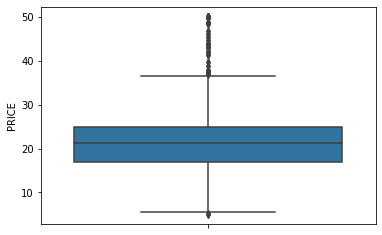

In [173]:
sns.boxplot(y=df['PRICE'])

In [ ]:
# 1st assumptions --> Ensure the x variables has a linear relationship with the Y variable

In [ ]:
df.corr()
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(), annot=True)

In [ ]:
plt.scatter(df['CRIM'], df['PRICE'])

In [ ]:
plt.scatter(df['LSTAT'], df['PRICE'])

In [ ]:
plt.scatter(df['RM'], df['PRICE'])

In [ ]:
sns.regplot(df['RM'], df['PRICE'])

In [ ]:
x = df.iloc[:,:13]

In [ ]:
x.head()

In [ ]:
y = df['PRICE']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
x_train.shape

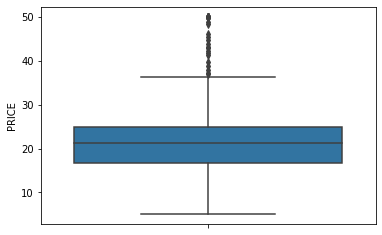

In [175]:
sns.boxplot(y=y_train)

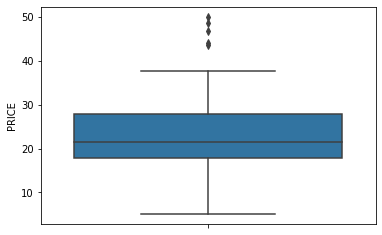

In [176]:
sns.boxplot(y=y_test)

In [ ]:
y_train.shape

In [ ]:
x_train.head()

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()

In [ ]:
model = lr.fit(x_train,y_train)

In [ ]:
model

In [ ]:
model.coef_

In [ ]:
model.intercept_

In [ ]:
x_test.iloc[1]

In [ ]:
#pred_price = 34+-1.11254928e-01*(1.13081)+5.18680433e-02*(0.00000)

In [ ]:
pred_price = model.predict(x_test)

In [ ]:
pred_price[:5]

In [ ]:
y_test[:5]

In [ ]:
import statsmodels.api as sm

In [ ]:
model_stats = sm.OLS(y_train,x_train)

In [ ]:
model_stats = model_stats.fit()

In [ ]:
model_stats.fittedvalues[:5]

In [ ]:
y_train[:5]

In [ ]:
model_stats.summary2()

In [ ]:
x_train.columns

In [ ]:
model_new = sm.OLS(y_train,x_train.drop(['AGE','NOX','INDUS'],axis=1))

In [ ]:
m=model_new.fit()

In [ ]:
m.summary2()

In [ ]:
m.params

In [ ]:
m.resid

In [ ]:
# Forward propagation (p-value) --> Add one variable at a time, see p-value and continue adding
# Backward propagation (p-value) --> Use all the variables & based on p-value drop irrelavant vars
# Stepwise --> AIC

In [ ]:
# R-squared --> Co-efficient determination --> Proportion of ssreg in sst
# Adjusted R-squared --> Penalising the model each time an independent variable is added

# sserror --> Error/residual between fitted and actual values(Unexplained error)
# ssreg --> Squared Error between the fitted and mean value of y due to regression line (Explained error)
# sstotal --> Squared error between actual and mean value of y (yi-mean(y))

In [ ]:
# Assumption 2 --> Avoid multi-collinearity (x vars themselves shouldn't be highly correlated)
# Variance Inflation Factor (VIF)

In [ ]:
# Assumption 3 --> Errors shouldn't have a pattern or erros should be normally distributed

In [ ]:
df1 = pd.read_csv("D://data/mtcars.csv")

In [ ]:
df1.columns

In [ ]:
plt.scatter(df1['wt'],df1['cyl'])

In [ ]:
plt.scatter(df1['mpg'],df1['hp'])

In [ ]:
plt.scatter(df1['mpg'],df1['wt'])

In [ ]:
sns.distplot(df['PRICE'])

In [ ]:
sns.distplot(m.resid)

In [ ]:
pred_vals = m.predict(x_test.drop(['AGE','INDUS','NOX'],axis=1))

In [ ]:
pred_vals

In [ ]:
y_test

In [ ]:
error_df = pd.DataFrame({'Actual':y_test,'Predicted':pred_vals})

In [ ]:
error_df=error_df.reset_index(drop=True)

In [ ]:
plt.figure(figsize=(15,15))
error_df.plot()

In [ ]:
sns.boxplot(y=y_test)

In [ ]:
# model's performance

In [ ]:
# MSE --> sum(actual_val-expected_val)2
# MAE
# RMSE

In [ ]:
from  sklearn.metrics import mean_squared_error

In [ ]:
mean_squared_error(y_test,pred_vals)

In [ ]:
np.sqrt(mean_squared_error(y_test,pred_vals))

In [ ]:
# L1, l2 Regularisation Techniques

In [ ]:
# Treating outliers
# Handling Categorical features

In [ ]:
# Overfitting
# Underfitting

In [ ]:
# Decision Tree --> Condition based model
# It creates Decision boundaries

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
tree = DecisionTreeRegressor(max_depth=4)

In [ ]:
tree_model = tree.fit(x_train,y_train)

In [ ]:
tree_model

In [ ]:
#!pip install dtreeviz

In [ ]:
from dtreeviz.trees import dtreeviz

In [ ]:
tree_viz = dtreeviz(tree_model,x_train,y_train,target_name='PRICE',feature_names=x_train.columns)

In [ ]:
tree_viz

In [ ]:
pred_tree = tree_model.predict(x_test)

In [ ]:
np.sqrt(mean_squared_error(y_test,pred_tree))

In [ ]:
# Advantages --> Easy to understand & explain, comprehensive, Unaffected by the outliers
# Disadvantages --> Generalised output,(avg of y for a range of x values)

In [ ]:
# SVM, KNN

In [ ]:
# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf = RandomForestRegressor(n_estimators=100)

In [ ]:
rf = rf.fit(x_train,y_train)

In [ ]:
pred_rf = rf.predict(x_test)

In [ ]:
np.sqrt(mean_squared_error(y_test,pred_rf))

In [ ]:
rf.decision_path

In [ ]:
rf._get_param_names()

In [ ]:
rf.feature_importances_

In [ ]:
x_train.columns

In [ ]:
from xgboost import XGBRegressor

In [ ]:
xgb = XGBRegressor(n_estimators=100)

In [ ]:
XGB_model = xgb.fit(x_train,y_train)

In [ ]:
help(XGBRegressor)

In [ ]:
XGB_model

In [ ]:
pred_xgb = XGB_model.predict(x_test)

In [ ]:
pred_xgb

In [ ]:
np.sqrt(mean_squared_error(y_test,pred_xgb))

In [ ]:
reg = pd.read_csv("D://data/Regression.csv")

In [ ]:
reg.head(5)

In [ ]:
reg.dropna(inplace=True)

In [ ]:
x = reg.iloc[:,:6]

In [ ]:
dummies = pd.get_dummies(x[['Job Type','Marital Status','Education','Metro City']], drop_first=True)

In [ ]:
dummies

In [ ]:
x.drop(['Job Type','Marital Status','Education','Metro City'], axis=1, inplace=True)

In [ ]:
x1 = pd.concat([dummies,x], axis=1)

In [ ]:
x1

In [ ]:
y = reg['Purchase made']

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()

In [ ]:
model = lr.fit(x1,y)

In [ ]:
model